In [21]:
import torchvision
import matplotlib.pyplot as plt
import torch
import os
import random
from PIL import Image
from torchvision.utils import save_image
from coordx import coordx_net
from helpers import psnr, train, accelerated_train

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Image Example

0077


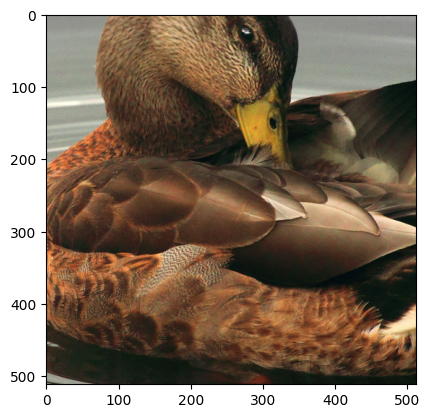

In [24]:
# load a random div2k image (assuming you have all 800 images in the following folder)
n = str(random.randint(1, 800)).zfill(4)
# use this line instead if you just have the 12 images from github
# n = str(random.randint(1, 800)).zfill(4)
img = Image.open(f'div2k/DIV2k_train_HR/{n}.png')
transforms = torchvision.transforms.Compose([
    torchvision.transforms.CenterCrop(512),
    torchvision.transforms.ToTensor()
])
img = transforms(img)
print(n)
plt.imshow(img.permute(1, 2, 0))

In [25]:
y_coords = img.shape[1]
x_coords = img.shape[2]
x = torch.linspace(1, x_coords, x_coords).reshape(x_coords,1)
y = torch.linspace(1, y_coords, y_coords).reshape(y_coords,1)

In [26]:
### REGULAR TRAIN EXAMPLE ###
# coordx network for image (2 branches) with a scale factor of 2 on the last hidden layer before the fusion
model = coordx_net(n_branches=2, out_channels=3, hidden_size=256, R=2, R_strat=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
img = img.to(device)
x = x.to(device)
y = y.to(device)
train(model=model, optimizer=optimizer, dims=[x,y], target=img, n_epochs=20000, print_step=1000)

Iteration: 0 | Loss: 0.11278422176837921
Iteration: 1000 | Loss: 0.005394354462623596
Iteration: 2000 | Loss: 0.0025052351411432028
Iteration: 3000 | Loss: 0.0014010888990014791
Iteration: 4000 | Loss: 0.0008886067080311477
Iteration: 5000 | Loss: 0.0006122921477071941
Iteration: 6000 | Loss: 0.00046339232358150184
Iteration: 7000 | Loss: 0.00037602600059472024
Iteration: 8000 | Loss: 0.0003164289519190788
Iteration: 9000 | Loss: 0.0002751624851953238
Iteration: 10000 | Loss: 0.0002486010198481381
Iteration: 11000 | Loss: 0.00022852091933600605
Iteration: 12000 | Loss: 0.00021464403835125268
Iteration: 13000 | Loss: 0.000205089250812307
Iteration: 14000 | Loss: 0.00020010012667626143
Iteration: 15000 | Loss: 0.00019266060553491116
Iteration: 16000 | Loss: 0.000186068398761563
Iteration: 17000 | Loss: 0.00018236774485558271
Iteration: 18000 | Loss: 0.0001801614125724882
Iteration: 19000 | Loss: 0.00017897137149702758
Iteration: 20000 | Loss: 0.00017441096133552492


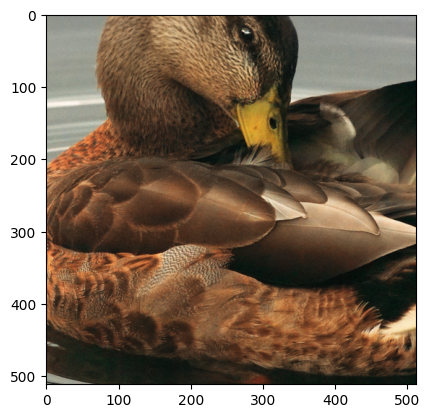

PSNR: 37.588645935058594


In [27]:
final = model([x,y])
plt.imshow(final.detach().cpu().permute(1, 2, 0).numpy())
plt.show()
print(f'PSNR: {psnr(img, final)}')

In [28]:
### ACCELERATED TRAIN EXAMPLE ###
# coordx network for image (2 branches) with a scale factor of 2 on the last hidden layer before the fusion
model = coordx_net(n_branches=2, out_channels=3, hidden_size=256, R=2, R_strat=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
img = img.to(device)
x = x.to(device)
y = y.to(device)
accelerated_train(model=model, optimizer=optimizer, dims=[x,y], target=img, n_epochs=20000, print_step=1000, n_samples=100000) #0.0011 psnr=29

Iteration: 0 | Loss: 0.11482883989810944
Iteration: 1000 | Loss: 0.00843546912074089
Iteration: 2000 | Loss: 0.004040659870952368
Iteration: 3000 | Loss: 0.0023312843404710293
Iteration: 4000 | Loss: 0.0014991526259109378
Iteration: 5000 | Loss: 0.001084243063814938
Iteration: 6000 | Loss: 0.0008184148464351892
Iteration: 7000 | Loss: 0.0006451663793995976
Iteration: 8000 | Loss: 0.0005353595479391515
Iteration: 9000 | Loss: 0.00046849530190229416
Iteration: 10000 | Loss: 0.00042376824421808124
Iteration: 11000 | Loss: 0.0003867211635224521
Iteration: 12000 | Loss: 0.0003569427353795618
Iteration: 13000 | Loss: 0.00033591417013667524
Iteration: 14000 | Loss: 0.00031661996035836637
Iteration: 15000 | Loss: 0.0003032399690710008
Iteration: 16000 | Loss: 0.0002889619208872318
Iteration: 17000 | Loss: 0.00028386071790009737
Iteration: 18000 | Loss: 0.000272866542218253
Iteration: 19000 | Loss: 0.00026595243252813816
Iteration: 20000 | Loss: 0.00025783359888009727


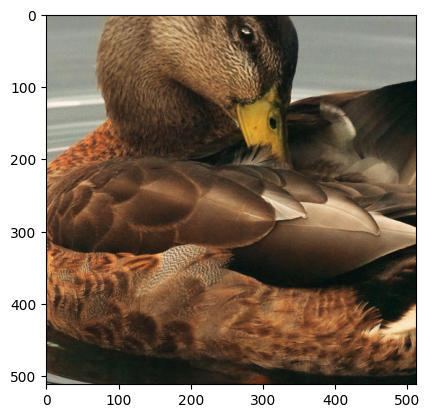

PSNR: 35.8907356262207


In [29]:
final = model([x,y])
plt.imshow(final.detach().cpu().permute(1, 2, 0).numpy())
plt.show()
print(f'PSNR: {psnr(img, final)}')

In [32]:
### ACCELERATED SAMPLING USING POSITIONAL ENCODING EXAMPLE ###
# coordx network for image (2 branches) with a scale factor of 2 on the last hidden layer before the fusion using positional encoding + ReLU instead of sine
model = coordx_net(n_branches=2, out_channels=3, hidden_size=256, R=2, R_strat=1, initialize=False, PE=True, maxes=[512,512]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
img = img.to(device)
x = x.to(device)
y = y.to(device)
accelerated_train(model=model, optimizer=optimizer, dims=[x,y], target=img, n_epochs=20000, print_step=1000, n_samples=25000)

Iteration: 0 | Loss: 0.08591582626104355
Iteration: 1000 | Loss: 0.02606610208749771
Iteration: 2000 | Loss: 0.01806659996509552
Iteration: 3000 | Loss: 0.0139586441218853
Iteration: 4000 | Loss: 0.011713381856679916
Iteration: 5000 | Loss: 0.00858660414814949
Iteration: 6000 | Loss: 0.007933421060442924
Iteration: 7000 | Loss: 0.006792755331844091
Iteration: 8000 | Loss: 0.0066178240813314915
Iteration: 9000 | Loss: 0.006496518384665251
Iteration: 10000 | Loss: 0.006092502269893885
Iteration: 11000 | Loss: 0.005363449454307556
Iteration: 12000 | Loss: 0.006169960368424654
Iteration: 13000 | Loss: 0.005214272066950798
Iteration: 14000 | Loss: 0.0050719198770821095
Iteration: 15000 | Loss: 0.004342107102274895
Iteration: 16000 | Loss: 0.005147464573383331
Iteration: 17000 | Loss: 0.0039651901461184025
Iteration: 18000 | Loss: 0.003949514590203762
Iteration: 19000 | Loss: 0.00405899528414011
Iteration: 20000 | Loss: 0.0036729241255670786


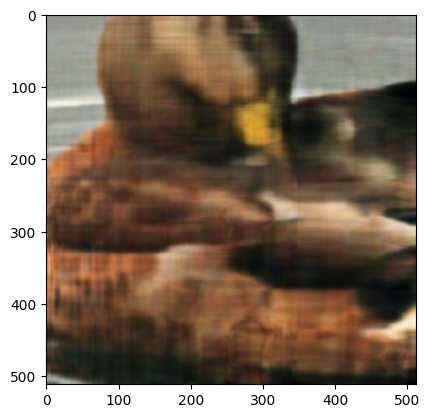

PSNR: 24.346569061279297


In [33]:
# positional encoding network is not as good as the regular network when sampling
final = model([x,y])
plt.imshow(final.detach().cpu().permute(1, 2, 0).numpy())
plt.show()
print(f'PSNR: {psnr(img, final)}')

### Video Example

In [19]:
vidname = "videos/cat_426_240.mp4"
# vidname = "videos/bikes.mp4"
# (T, H, W, C)
vid = torchvision.io.read_video(vidname, pts_unit='sec')[0].to(torch.float32)
vid = vid / 255.0
vid = vid.to(device)

In [7]:
t_coords = vid.shape[0]
y_coords = vid.shape[1]
x_coords = vid.shape[2]
x = torch.linspace(1, x_coords, x_coords).reshape(x_coords,1).to(device)
y = torch.linspace(1, y_coords, y_coords).reshape(y_coords,1).to(device)
t = torch.linspace(1, t_coords, t_coords).reshape(t_coords,1).to(device)

In [ ]:
### EXAMPLE: training a coordx network for video (3 branches) ###
model = coordx_net(n_branches=3, out_channels=3, hidden_size=1024, R=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
accelerated_train(model=model, optimizer=optimizer, dims=[x,y,t], target=vid, n_epochs=100000, print_step=1000, n_samples=100000)

Iteration: 0 | Loss: 0.06750204414129257
Iteration: 1000 | Loss: 0.017180059105157852
Iteration: 2000 | Loss: 0.011508234776556492
Iteration: 3000 | Loss: 0.008599244989454746
Iteration: 4000 | Loss: 0.006080116610974073
Iteration: 5000 | Loss: 0.00474364822730422
Iteration: 6000 | Loss: 0.004662484861910343
Iteration: 7000 | Loss: 0.003949030302464962
Iteration: 8000 | Loss: 0.0034478979650884867
Iteration: 9000 | Loss: 0.003327532671391964
Iteration: 10000 | Loss: 0.002648889785632491
Iteration: 11000 | Loss: 0.0023416292387992144
Iteration: 12000 | Loss: 0.0025575447361916304
Iteration: 13000 | Loss: 0.0024990455713123083
Iteration: 14000 | Loss: 0.0024252019356936216
Iteration: 15000 | Loss: 0.0021154279820621014
Iteration: 16000 | Loss: 0.0019751416984945536
Iteration: 17000 | Loss: 0.00198643677867949
Iteration: 18000 | Loss: 0.0019129813881590962
Iteration: 19000 | Loss: 0.001865590806119144
Iteration: 20000 | Loss: 0.0017581876600161195
Iteration: 21000 | Loss: 0.00156888051424

In [ ]:
## SAVE VIDEO ##
# we have to query the model n frames at a time because of memory constraints
os.mkdir("output_videos") if not os.path.exists("output_videos") else None
res = []
vidname = 'example_output'
for i in range(1, 332, 4):
    t = torch.linspace(i, i+3, 4).reshape(4,1).to(device)
    with torch.no_grad():
        out = model([x,y,t])
        out = out * 255
        res.append(out.cpu())
output = torch.cat(res, dim=0)
torchvision.io.write_video(f"output_videos/{vidname}.mp4", output, fps=30)

In [20]:
## CHECK PSNR ##
vidname = "output_videos/cat.mp4"
# (T, H, W, C)
vid2 = torchvision.io.read_video(vidname, pts_unit='sec')[0].to(torch.float32)
vid2 = vid2 / 255.0
vid2 = vid2.to(device)
psnr(vid, vid2)

35.827857971191406